# Objectives

 1. Cross-sectional asset pricing tests
 
 2. full implementation of Time-series Asset Pricing Tests
  
 3. Economic relevancy of the model rejection
 

Appendix 

- Fama Macbeth procedure

In [8]:
# First we start loading our favourite packages with the names we used to
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

#  1. Cross-Sectional Tests

We will start by loading that on the market portoflio and our test assets

We will then merge then two together

Two steps:

1. estimate betas and average returns
2. estiamte factor loading--> regression on average returns on betas

In [9]:
# import market factor
url = "https://www.dropbox.com/s/9346pp2iu5prv8s/MonthlyFactors.csv?dl=1"
Factors = pd.read_csv(url,index_col=0, 
                         parse_dates=True,na_values=-99)
Factors=Factors
# keep only market and RF
Factors=Factors.iloc[:,0:2]
Factors.head()



,RF,MKT
Date,,
1926-07-31,0.22,3.18
1926-08-31,0.25,2.89
1926-09-30,0.23,0.59
1926-10-31,0.32,-2.92
1926-11-30,0.31,2.84


### Import Test assets: Book to Market sorted portfolios

In [10]:
# import BEME (Book-equity over Market equity) sorted portfolios
# BEME 1 has low book to market- > Known as growth stocks (example: Tesla, Amazon, Facebook)

# BEME 10 has high book to market -> Known as value stocks ( old firms: utilities, banks, insurance companies)

# but it changes....

url = "https://www.dropbox.com/s/gds8ho9rt1imw03/Valueportfolios.csv?dl=1"
parser = lambda date: pd.to_datetime(date,format='%Y%m')
Data = pd.read_csv(url,index_col=0, 
                         parse_dates=True,date_parser=parser,skiprows=23,nrows=1092,na_values=-99.99)

print(Data.tail())
# neeed to adjsut the date to end of month convention (Even thugh both returns for a given month are end-of-month to end of month,
# when we importer the value portfolios python used as date the first day of the month . To fix that, we will convert it to end of month
# It is important to do that before the merge. Why? )
Data.index=Data.index+pd.tseries.offsets.MonthEnd()
print(Data.head())
# ready to merge with Market and RF

Data=pd.merge(Data,Factors,left_index=True,right_index=True)
Data.head()

            BEME1  BEME2  BEME3  BEME4  BEME5  BEME6  BEME7  BEME8  BEME9  \
2017-02-01   4.29   5.22   3.52   2.47   3.90   0.96   2.03   3.24   3.38   
2017-03-01   0.97   2.04   0.30   0.31   0.07  -0.70  -0.99  -1.22  -3.09   
2017-04-01   2.44   1.32   2.16   1.39   2.43  -0.52  -0.44  -0.56  -0.64   
2017-05-01   2.59   2.86   3.10  -0.23   1.29  -0.33  -1.26  -0.70  -2.44   
2017-06-01   0.29  -0.47   0.25   1.15  -0.69   1.21   1.67   2.57   4.31   

            BEME10  
2017-02-01    5.03  
2017-03-01   -2.28  
2017-04-01   -0.86  
2017-05-01   -2.68  
2017-06-01    5.70  
            BEME1  BEME2  BEME3  BEME4  BEME5  BEME6  BEME7  BEME8  BEME9  \
1926-07-31   4.63   1.24  11.40   1.68   1.50   2.09   2.73   1.58   0.63   
1926-08-31   0.15   2.18   6.40   2.38   1.58   2.63   4.46   4.94   8.31   
1926-09-30  -0.11  -2.30   6.32   0.73  -0.89   0.38  -0.28   0.17  -2.16   
1926-10-31  -3.78  -1.63  -5.01  -1.41  -2.31  -2.10  -4.65  -2.80  -5.46   
1926-11-30   6.03   1.49  

,BEME1,BEME2,BEME3,BEME4,BEME5,BEME6,BEME7,BEME8,BEME9,BEME10,RF,MKT
1926-07-31,4.63,1.24,11.40,1.68,1.50,2.09,2.73,1.58,0.63,0.52,0.22,3.18
1926-08-31,0.15,2.18,6.40,2.38,1.58,2.63,4.46,4.94,8.31,3.92,0.25,2.89
1926-09-30,-0.11,-2.30,6.32,0.73,-0.89,0.38,-0.28,0.17,-2.16,0.44,0.23,0.59
1926-10-31,-3.78,-1.63,-5.01,-1.41,-2.31,-2.10,-4.65,-2.80,-5.46,-1.17,0.32,-2.92
1926-11-30,6.03,1.49,1.11,3.63,1.97,1.80,4.00,3.85,2.77,1.76,0.31,2.84


- check it matched correctly!

In [11]:


# transform in excess returns
Data.iloc[:,0:10]=Data.iloc[:,0:10].subtract(Data['RF'],axis=0)
Data.iloc[:,11]=Data.iloc[:,11].subtract(Data['RF'],axis=0)
# take the risk-free rate column out of the database
del Data['RF']
Data.head()

,BEME1,BEME2,BEME3,BEME4,BEME5,BEME6,BEME7,BEME8,BEME9,BEME10,MKT
1926-07-31,4.41,1.02,11.18,1.46,1.28,1.87,2.51,1.36,0.41,0.30,2.96
1926-08-31,-0.10,1.93,6.15,2.13,1.33,2.38,4.21,4.69,8.06,3.67,2.64
1926-09-30,-0.34,-2.53,6.09,0.50,-1.12,0.15,-0.51,-0.06,-2.39,0.21,0.36
1926-10-31,-4.10,-1.95,-5.33,-1.73,-2.63,-2.42,-4.97,-3.12,-5.78,-1.49,-3.24
1926-11-30,5.72,1.18,0.80,3.32,1.66,1.49,3.69,3.54,2.46,1.45,2.53


# Step1 : estimating betas and average returns in the full sample

In [12]:
# Lets focus on the sample Fama-French originally constructed the value factor

df=Data['1963':'1992']
# cosntruct excess returns for the  test portoflios
Estimates=pd.DataFrame(df.mean())
Estimates.columns=['AvgReturns']
Estimates

,AvgReturns
BEME1,0.321694
BEME2,0.441944
BEME3,0.427750
BEME4,0.404806
BEME5,0.396583
BEME6,0.537222
BEME7,0.639528
BEME8,0.738361
BEME9,0.847722
BEME10,0.958222


1. Easy to see the appeal of value investing BEME8,9,10 >> MKT
2. Does that mean the CAPM is wrong?

In [13]:
# import regression package
import statsmodels.api as sm


In [14]:
# estimating value portfolio beta 
y=df['BEME10'] #look at BEME10
x=df['MKT']
x=sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BEME10   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     810.3
Date:                Mon, 29 Oct 2018   Prob (F-statistic):           5.71e-94
Time:                        08:50:41   Log-Likelihood:                -924.46
No. Observations:                 360   AIC:                             1853.
Df Residuals:                     358   BIC:                             1861.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5026      0.168      3.000      0.003       0.173       0.832
MKT            1.0536      0.037     28.466      0.000       0.981       1.126
==============================================================================
Omnibus:                       61.250   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.223
Skew:                           0.824   Prob(JB):                     3.24e-34
Kurtosis:                       5.751   Cond. No.                         4.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# estimate betas for all portoflios

# Create a new column to store our beta estimates
Estimates['beta']=Estimates['AvgReturns']*0
# do a for loop across the portfolios
for portfolios in Estimates.index:
    print(portfolios)
    x=sm.add_constant(df['MKT'])
    y=df[portfolios]
    results = sm.OLS(y,x).fit()
    # store the betas
    Estimates.at[portfolios,'beta']=results.params[1]

Estimates


BEME1
BEME2
BEME3
BEME4
BEME5
BEME6
BEME7
BEME8
BEME9
BEME10
MKT


,AvgReturns,beta
BEME1,0.321694,1.087548
BEME2,0.441944,1.054243
BEME3,0.427750,1.048223
BEME4,0.404806,1.011083
BEME5,0.396583,0.919284
BEME6,0.537222,0.912614
BEME7,0.639528,0.907628
BEME8,0.738361,0.903209
BEME9,0.847722,0.952417
BEME10,0.958222,1.053611


In [16]:
Estimates.loc['BEME1',:]

AvgReturns    0.321694
beta          1.087548
Name: BEME1, dtype: float64

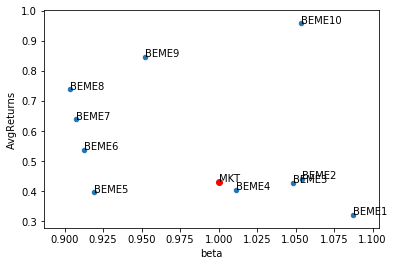

In [17]:
y=Estimates.plot(x='beta',y='AvgReturns',kind='scatter')
y.plot(Estimates.loc['MKT','beta'],Estimates.loc['MKT','AvgReturns'],'or')
for label, x, y in zip(Estimates.index,Estimates.beta, Estimates.AvgReturns):
    plt.annotate(label,xy=(x, y), fontsize=10)
    
# for label in Estimates.index:
#     x=Estimates.loc[label,'beta'] 
#     y=Estimates.loc[label,'AvgReturns']
#     plt.annotate(label,xy=(x, y), fontsize=10)
    

Avg returns grow from 1 to 10. Value stocks, stocks where market price is low realtive to accouting value, have higher average returns going forward

betas are all over the place. Perhaps statisitcally identical across portfolios

# Step 2: Cross-sectional regression of average returns on betas

In [18]:
y= Estimates['AvgReturns'][0:10]
x= sm.add_constant(Estimates['beta'][0:10])
#x=Estimates['beta'][0:10]
results= sm.OLS(y,x,data=Estimates).fit()
results.summary()


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AvgReturns   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                    0.5342
Date:                Mon, 29 Oct 2018   Prob (F-statistic):              0.486
Time:                        08:50:41   Log-Likelihood:                 2.0113
No. Observations:                  10   AIC:                          -0.02268
Df Residuals:                       8   BIC:                            0.5825
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2985      0.997      1.302      0.229      -1.001       3.598
beta          -0.7382      1.010     -0.731      0.486      -3.067       1.591
==============================================================================
Omnibus:                        3.742   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                1.750
Skew:                           1.024   Prob(JB):                        0.417
Kurtosis:                       2.927   Cond. No.                         28.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

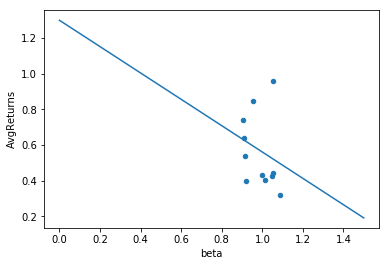

In [19]:
Estimates.plot(x='beta',y='AvgReturns',kind='scatter')
betas=np.linspace(0,1.5,20)
plt.plot(betas,results.predict(exog=sm.add_constant(betas)))
# plt.plot(betas,results.predict(exog=(betas)))
# plt.plot(betas,betas*df['MKT'].mean())

- R-squared very low. What we would expect here?

- Note that the market premium is negative!

- Note that the intercept is not zero, in fact very large


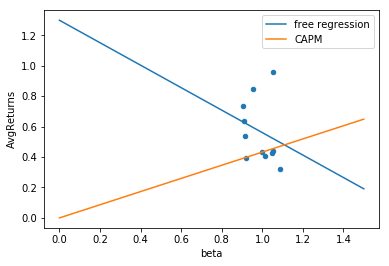

In [20]:
Estimates.plot(x='beta',y='AvgReturns',kind='scatter')
betas=np.linspace(0,1.5,20)
plt.plot(betas,results.predict(exog=sm.add_constant(betas)))
plt.plot(betas,betas*df['MKT'].mean())
plt.legend(['free regression','CAPM'])

We haven't done any tests

Lets develop a code that allow us to this plot for different samples quickly

What we need?

1. Select dates
2. estimate betas and average returns
3. run cross-sectional regression

4. do the plot

In [21]:
def CSregression(df,beg,end):
    df=df[beg:end] 
    E=pd.DataFrame(df.mean())
    E.columns=['AvgReturns']

    E['beta']=E['AvgReturns']*0
    # do a for loop across the portfolios
    for portfolios in E.index:
        x=sm.add_constant(df['MKT'])
        y=df[portfolios]
        results = sm.OLS(y,x).fit()
        E.at[portfolios,'beta']=results.params[1]

    y= E['AvgReturns'][0:10]
    betas=E['beta'][0:10]
    x= sm.add_constant(betas)
    results= sm.OLS(y,x,data=Estimates).fit()
    #results.summary()

    E.plot(x='beta',y='AvgReturns',kind='scatter')
    betas=np.linspace(0,1.5,20)
    plt.plot(betas,results.predict(exog=sm.add_constant(betas)))
    plt.plot(betas,betas*df['MKT'].mean())
    s=beg+":"+end
    plt.title(s)
    plt.axis([0,1.25*betas.max(),0,1.25*max(betas.max()*df['MKT'].mean(),E.AvgReturns.max())])
    for label, x, y in zip(E.index,E.beta, E.AvgReturns):
        plt.annotate(label.replace('BEME',''),xy=(x, y), fontsize=10)
    return E

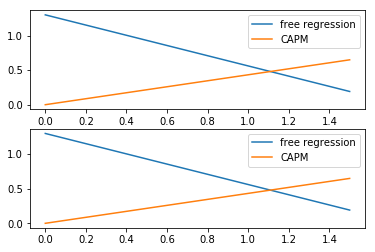

In [22]:
plt.subplot(2,1,1)
plt.plot(betas,results.predict(exog=sm.add_constant(betas)))
plt.plot(betas,betas*df['MKT'].mean())
plt.legend(['free regression','CAPM'])
plt.subplot(2,1,2)
plt.plot(betas,results.predict(exog=sm.add_constant(betas)))
plt.plot(betas,betas*df['MKT'].mean())
plt.legend(['free regression','CAPM'])

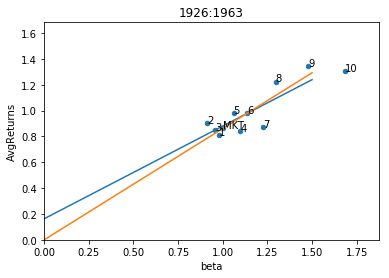

In [23]:
# Pre-CAPM discovery sample
E=CSregression(Data,beg='1926',end='1963')

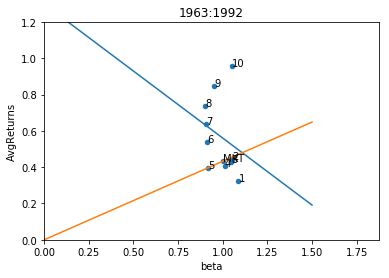

In [24]:
# CAPM is dead sample
E=CSregression(Data,beg='1963',end='1992')

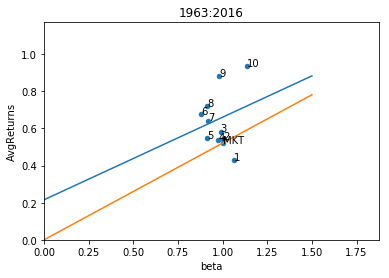

In [25]:
# post CAPM
E=CSregression(Data,beg='1963',end='2016')

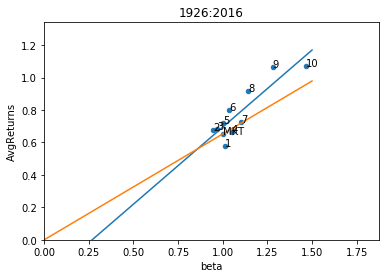

In [26]:
# Full sample
E=CSregression(Data,beg='1926',end='2016')

# Discussion: Value and Growth

- We see that portfolio 1: portfolios of stocks with low BookValue/Marketvalue does terribly relative to the market

- These are typically known among quants as growth stocks 

- This is just a name for stocks where their market value is so much higher that its' book accouting value

- They might or migh not grow. 

- Value stocks are stocks with high BookValue/MarketValue, stocks where the market is valuing they way less than the accounting value

- construction of these portfolios require accounting data, which is high quality only after 1963





# 2. Time-series Test (asset by asset)

Now lets do a formal statistical test.

For this we will follow the Time series approach which is much easier

To do the statistical test with the cross section approach see Fama macbeth procedure in the appendix 


- here is the time-series test procedure


Run the time series regression 

$$R_i^e =\alpha_i+\beta_{i,M} R_{M}^e+\epsilon_i$$

Test if $\alpha_i \neq 0$

Again it doesn't matter if positive or negative, since you can always go short

The TS regression automatically imposes   $E[R_{MKT}]=\lambda $

YOu basically do a standard t-test 

$$t=\frac{\alpha }{\sigma(\alpha)}$$

We say

 - if $|t|\geq 1.64$ there is a 10% chance that the market is MVE
 - if $|t|\geq 1.96$ there is a 5% chance that the market is MVE
 - if $|t|\geq 2.1$ there is a 2.5% chance that the market is MVE
 - if $|t|\geq 2.6$ there is a 1% chance that the market is MVE

In [27]:
df=Data['1963':'2016'] 
E=pd.DataFrame(df.mean())
E.columns=['AvgReturns']
x= sm.add_constant(df['MKT'])
y= df['BEME10']
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BEME10   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     1363.
Date:                Mon, 29 Oct 2018   Prob (F-statistic):          2.69e-161
Time:                        08:50:43   Log-Likelihood:                -1721.8
No. Observations:                 648   AIC:                             3448.
Df Residuals:                     646   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3454      0.137      2.527      0.012       0.077       0.614
MKT            1.1361      0.031     36.918      0.000       1.076       1.197
==============================================================================
Omnibus:                      121.703   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.995
Skew:                           0.768   Prob(JB):                    1.85e-121
Kurtosis:                       7.270   Cond. No.                         4.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
def TSregression(df,beg,end):
    df=df[beg:end] 
    E=pd.DataFrame(df.mean())
    E.columns=['AvgReturns']
    x= sm.add_constant(df['MKT'])
    E['std']=df.std()
    E['alpha']=E['AvgReturns']*0
    E['std_e']=E['AvgReturns']*0
    E['beta']=E['AvgReturns']*0
    E['std_beta']=E['AvgReturns']*0
    E['std_alpha']=E['AvgReturns']*0
    for portfolios in E.index[0:10]:
        y= df[portfolios]
        results= sm.OLS(y,x).fit()
        E.at[portfolios,'alpha']=results.params[0]
        E.at[portfolios,'beta']=results.params[1]
        E.at[portfolios,'std_e']=results.resid.std()
        E.at[portfolios,'std_alpha']=results.HC0_se[0]
        E.at[portfolios,'std_beta']=results.HC0_se[1]          
        E.at[portfolios,'pvalues']=results.pvalues[0] 
    
    E['t-stat']=E['alpha']/E['std_alpha']
    E.at['MKT','beta']=1 
    return E

In [29]:
TSresults=TSregression(Data,beg='1963',end='2016')
TSresults

,AvgReturns,std,alpha,std_e,beta,std_beta,std_alpha,pvalues,t-stat
BEME1,0.429151,5.044204,-0.123712,1.869759,1.061466,0.020843,0.074220,0.095136,-1.666833
BEME2,0.541836,4.623143,0.020034,1.349928,1.001831,0.015999,0.054048,0.707869,0.370668
BEME3,0.582701,4.581242,0.067784,1.396153,0.988611,0.016216,0.055828,0.220489,1.214158
BEME4,0.538225,4.619711,0.029787,1.667100,0.976173,0.021867,0.066858,0.651893,0.445523
BEME5,0.549583,4.432885,0.073302,1.833515,0.914432,0.021350,0.072508,0.312923,1.010958
BEME6,0.679460,4.343083,0.221188,1.944793,0.879855,0.023928,0.078129,0.004200,2.831076
BEME7,0.641960,4.567017,0.164307,2.115416,0.917066,0.031421,0.086505,0.050189,1.899401
BEME8,0.721574,4.626414,0.245044,2.257864,0.914911,0.032353,0.093092,0.006285,2.632271
BEME9,0.882006,4.939907,0.371075,2.378602,0.980958,0.030973,0.094467,0.000090,3.928115
BEME10,0.937114,6.087765,0.345374,3.452185,1.136108,0.045348,0.135874,0.011735,2.541878


# Discussion: BOOK to MARKET sorted portfolios risk-return relation is not explained by the CAPM

1. Value portfolios have very large alphas with respect to the market portfolio.
    - Portfolio 9 rejects the CAPM with a confidence of more than 99.99%
2. A long-short strategy is likely to blow the CAPM out of the water even more strongly
    - Value and growth portfolios have similar betas but very different returns!
    - One can use the growth portfolio to hedge market exposure cheaply since it has high beta but low returns!

In [30]:
df=Data['1963':'2016']
y= df.BEME9-df.BEME1
# average return similar to the market
print([y.mean()*12,df.MKT.mean()*12])
# sharpe ratio similar to the market
print([y.mean()/y.std()*12**0.5,df.MKT.mean()/df.MKT.std()*12**0.5])
# and has negative correlation with the market!
np.corrcoef(y,df.MKT)[1,0]

[5.434259259259261, 6.250185185185191]
[0.41608958304947596, 0.4087998372509934]


-0.09424643585838309

In [31]:
#Seeing this in a regression setting
x= sm.add_constant(df['MKT'])
results= sm.OLS(y,x).fit()
results.summary()
# negative beta consistent with the negative correlation
# alpha of the same magnitude as the risk-premium

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.789
Date:                Mon, 29 Oct 2018   Prob (F-statistic):             0.0164
Time:                        08:50:45   Log-Likelihood:                -1776.1
No. Observations:                 648   AIC:                             3556.
Df Residuals:                     646   BIC:                             3565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4948      0.149      3.330      0.001       0.203       0.787
MKT           -0.0805      0.033     -2.406      0.016      -0.146      -0.015
==============================================================================
Omnibus:                       19.250   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.246
Skew:                           0.043   Prob(JB):                     6.70e-10
Kurtosis:                       4.248   Cond. No.                         4.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3. Economic Magnitudes

- How large is the failure of the CAPM?

In [32]:
TSresults.loc[['MKT','BEME10'],:]

,AvgReturns,std,alpha,std_e,beta,std_beta,std_alpha,pvalues,t-stat
MKT,0.520849,4.413586,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN
BEME10,0.937114,6.087765,0.345374,3.452185,1.136108,0.045348,0.135874,0.011735,2.541878


In [33]:
[TSresults.loc['BEME10',:].alpha/TSresults.loc['BEME10',:].std_e,TSresults.loc['BEME10',:].AvgReturns/TSresults.loc['BEME10','std'],TSresults.loc['MKT',:].AvgReturns/TSresults.loc['MKT','std']]

[0.10004499152314464, 0.15393403920131488, 0.11801034804076813]

In [42]:
#calculations
# alphas as a fraction of risk premium
print(0.35/0.588)
# own sharpe ratio relative to the market
print(0.153/0.118-1)
# overall invrease in volatility
print(TSresults.loc[['BEME10'],'std'].values/TSresults.loc[['MKT'],'std'].values-1)
#market component
print(TSresults.loc[['MKT'],'std'].values*TSresults.loc[['BEME10'],'beta'].values)
#non market component
print(TSresults.loc[['BEME10'],'std_e'].values)



0.5952380952380952
0.2966101694915255
[0.37932404]
[5.01430905]
[3.45218523]


$$average(R_{BEME10,t})=\beta*average(R_{Mkt})+\alpha$$
$$average(R_{BEME10,t})=1.13*0.52+0.349$$
$$0.937=0.588+0.349$$

1. alpha is about 60% of the market risk premium

2. Sharpe ratio of the orthogonal component about the same as the market sharpe ratio

3. Own Sharpe ratio about 30% higher than the market 

3. investor can earn 60% more by having 13% more market exposure, 37% more volatility  

4. Can earn 30% higher return while bearing the same volatility, while having market beta of 0.7 instead of 1

## Rejection is economically large

A Mean Variance Investor (without other risky income beyond dividends from stocks) can benefit alot by deviating from the market portfolio


# APPENDIX

# Fama-MacBeth Procedure 

$$Rit = γ0t + γMt biM + nit$$

Structured approach to two key predictions of the model

- $\gamma_0=0$
- $\gamma_M>0$

Here is the approach:

1. Estimate βiM for each portfolio (denote the estimate biM). Assume that the betas do not change over time; hence, you can estimate the betas using full-period OLS regressions.

2. Each month estimate the cross-sectional regression, Rit = γ0t + γMt biM + nit. Note: the estimated beta (biM ) is the same for every time period (i.e., it has no time subscript).

3. Compute the time series average of the estimates of γ0 and γM.

4. In addition, compute the standard error and t-stat of the time series averages. 

In [ ]:
# here I am just initiating a dataframe wich has as index the dates

FamaMacbeth=Data.iloc[:,0:2].copy()
FamaMacbeth.columns=['gamma0','gamma1']
# whatever values these columns have willl be overwritten by the for loop below

x=sm.add_constant(Estimates['beta'])
for date in Data.index:
    y=(Data.loc[date,:]).iloc[0:10]
    results = sm.OLS(y,x).fit()
    # record slope estiamtes
    FamaMacbeth.set_value(date,'gamma0',results.params[0])
    FamaMacbeth.set_value(date,'gamma1',results.params[1])


coefficientsAVG=FamaMacbeth.mean()
coefficientsSTDEV=FamaMacbeth.std()
samplesize=FamaMacbeth.shape[0]


In [ ]:
coefficientsAVG/(coefficientsSTDEV/(samplesize**0.5))


## Testing if characteristics predict returns better than betas


You can also add other factors that are strange to he model. Recall that the model predicts

$$E[Ri] = γ0 + γM\beta_M $$

Nothing else belongs there.

For example, lets say we add some characteristic X that varies across firms and across time

$$Rit = γ0t + γMt biM + \gamma_{X,t} X_t+ nit$$

Structured approach to two key predictions of the model

- $\gamma_0=0$
- $\gamma_M>0$

What does the model predict about $\gamma_{X,t}$?

For example, we could use as X the decile of the BE/ME: 1,2,...10



In [ ]:
Estimates.set_value(Estimates.index,'rank',range(1,11))
Estimates

In [ ]:
FamaMacbeth=Data.iloc[:,0:3].copy()
FamaMacbeth.columns=['gamma0','gamma1','gamma2']
# whatever values these columns have willl be overwritten by the for loop below

x=sm.add_constant(Estimates[['beta','rank']])
for date in Data.index:
    y=(Data.loc[date,:]).iloc[0:10]
    results = sm.OLS(y,x).fit()
    # record slope estiamtes
    FamaMacbeth.set_value(date,'gamma0',results.params[0])
    FamaMacbeth.set_value(date,'gamma1',results.params[1])
    FamaMacbeth.set_value(date,'gamma2',results.params[2])

coefficientsAVG=FamaMacbeth.mean()
coefficientsSTDEV=FamaMacbeth.std()
samplesize=FamaMacbeth.shape[0]
coefficientsAVG/(coefficientsSTDEV/(samplesize**0.5))

What does that mean?

The BEME rank is much more informative about the average return of the portfolio than the portfolio beta!

The Model (CAPM) predicts that all we need to know is the beta to figure out the expected return. 

This test show that this is clearly not true. BEME rank has a very strong relation with average return, so strong in fact that makes our estiamte of the premium to exposure to the market statistically insignificant (gamma1)

What does beating the market means?

- It does not mean having an average return higher than the market--it can be jsut beta
- it means having an average return that cannot be explained by exposure to the market. 
- The gamma2 different from zero means that a trading strategy based on the BEME rank can beat the market
- It can generate average return that is unexplained by variation in risk (beta) .



Using characteristics is nice because it provides guidance on why the model is failing

But we can also test the model by simply asking if the portfolio alphas are small enough

Recall that the mdoel predicts that the betas must explain the expected returns perfectly in a long enough sample


- how to know if our sample is large enough?

  - basically depends on how volatile are returns

  - if returns are very volatile, you will need a very long sample to have precise estimates of average returns

- Defining the strategy true alpha as

$$\alpha=E[R_t]-\beta \lambda$$

and the estimate alpha (the error in the model) as

$$\hat{\alpha}=\frac{\sum_{t=1}^TR_t}{T}-\beta \lambda$$


$$\sigma(\hat{\alpha})=\sigma(R_t-\beta R_{MKT})/\sqrt{T}$$

-  we can then use these estimates to put confidence bounds around our estimates of average returns. 

We know that

$$\alpha \in [\hat{\alpha} -1.96\sigma(\hat{\alpha}),\hat{\alpha} +1.96\sigma(\hat{\alpha})]$$

with 95% probability


- How to estimate $\sigma(R_t-\beta R_{MKT})$?
- Our earlier time-series regression did that for us
- We just need to record the volatiltiy of the residuals


- lets first save our alphas
- I use cs to denote these are the alphas of the cross-sectional approach
- We will cover the Time-series approach soon, and I promise you like it much more (much easier)
- But the cross-sectional is useful to emphasize the intuition


In [ ]:
y= Estimates['AvgReturns']
x= sm.add_constant(Estimates['beta'])

results= sm.OLS(y,x).fit()
Estimates['alpha_cs']=Estimates['AvgReturns']-results.predict()

In [ ]:
Estimates['std_cs']=Estimates['AvgReturns']*0
x=sm.add_constant(Data['MKT'])

for portfolios in Estimates.index:
    y=Data[portfolios]
    results = sm.OLS(y,x).fit()
    # record slope estiamtes
    Estimates.set_value(portfolios,'std_cs',results.resid.std())

Estimates

You should think "std_cs" as the volatility of the strategy that invests in the portfolio but hedges exposure to the market



In [ ]:
y= Estimates['AvgReturns']
x= (Estimates['beta'])
results= sm.OLS(y,x,data=Estimates).fit()
Estimates.plot(x='beta',y='AvgReturns',kind='scatter')
betas=np.linspace(0,1.5,20)
plt.plot(Estimates['beta'],results.predict())
plt.errorbar(x,y,yerr=1.64*Estimates['std_cs']/(Data.shape[0]**0.5),fmt='o')

for i in range(0,10):
    plt.text(x[i],y[i],i+1)

- Some of the alphas are small relative to how volatile is the residual

- But some seem much more signifcant

- It certainly true that the CAPM is not terrible in this sample, for these portfolios

- to formally do a test for each individual asset we can construct a standard t-test using the abover error bars


You basically do a standard t-test 

$$t=\frac{\hat{\alpha} }{\sigma(\hat{\alpha})}$$





In [ ]:
Estimates.alpha_cs/(Estimates.std_cs/(Data.shape[0]**0.5))